# Спрос на рейсы авиакомпании

Необходимо получить требую информацию из базы данных российской авиакомпании (SQL-запросы), затем, проанализировав результаты 1 и 3 запросов, понять предпочтения пользователей, покупающих билеты на разные направления:

-построить графики: модели самолётов и количество рейсов, города и количество рейсов и топ-10 городов и количество рейсов <br>
-сделать выводы по каждому из графиков, пояснить результат.

## SQL-запросы

<b>Задача 1</b><br>
Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке:<br>
model<br>
flights_amount

``` sql
SELECT (SELECT model FROM aircrafts WHERE aircrafts.aircraft_code = flights.aircraft_code) as model, COUNT(flight_id) as flights_amount FROM flights
WHERE (EXTRACT(year FROM departure_time::date) = 2018) AND (EXTRACT(month FROM departure_time::date) = 9)
GROUP BY model
```

<b>Результат:</b>

|        MODEL        | FLIGHTS_AMOUNT |
|:-------------------:|:--------------:|
| Airbus A319-100     | 607            |
| Airbus A321-200     | 960            |
| Boeing 737-300      | 630            |
| Boeing 767-300      | 600            |
| Boeing 777-300      | 300            |
| Bombardier CRJ-200  | 4446           |
| Cessna 208 Caravan  | 4557           |
| Sukhoi SuperJet-100 | 4185           |

<b>Задача 2</b><br>
Посчитайте отправленные в сентябре рейсы самолётов следующих моделей:
Boeing,
Airbus,
другие (“other”).
Назовите получившуюся переменную flights_amount и выведите её значение на экран.

``` sql
SELECT
     (CASE 
        WHEN (aircrafts.model LIKE 'Boeing%') 
        THEN 'Boeing'
        WHEN (aircrafts.model LIKE 'Airbus%')
        THEN 'Airbus'
        ELSE 'other'
    END) as model,
    COUNT(flight_id) as flights_amount 
FROM flights INNER JOIN aircrafts on aircrafts.aircraft_code = flights.aircraft_code
WHERE EXTRACT(month FROM departure_time::date)=9
GROUP BY (CASE 
        WHEN (aircrafts.model LIKE 'Boeing%') 
        THEN 'Boeing'
        WHEN (aircrafts.model LIKE 'Airbus%')
        THEN 'Airbus'
        ELSE 'other'
    END)
```

<b>Результат:</b>

|  MODEL | FLIGHTS_AMOUNT |
|:------:|:--------------:|
| Airbus | 1567           |
| Boeing | 1530           |
| other  | 13188          |

<b>Задача 3</b><br>

Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
Выводите столбцы в таком порядке:<br>
city,<br>
average_flights.

``` sql
SELECT 
    DISTINCT subq.airp_city as city,
    AVG(subq.count_flights) as average_flights
    
FROM 
     (SELECT 
       airports.city AS airp_city,
       EXTRACT(day from arrival_time::date) AS arr_day,
       COUNT(flight_id) as count_flights 
     FROM flights INNER JOIN airports on flights.arrival_airport = airports.airport_code
     WHERE flights.ARRIVAL_TIME :: DATE < '2018-09-01 00:00:00'
                AND flights.ARRIVAL_TIME :: DATE >= '2018-08-01 00:00:00'
     GROUP BY arr_day,airp_city) as subq
GROUP BY city

```

<b>Результат:</b>

| CITY                     | AVERAGE_FLIGHTS |
|--------------------------|-----------------|
| Абакан                   | 3.87097         |
| Анадырь                  | 1               |
| Анапа                    | 2.16129         |
| Архангельск              | 5.35484         |
| Астрахань                | 2.45161         |
| Барнаул                  | 2.6129          |
| Белгород                 | 6               |
| Белоярский               | 2               |
| Благовещенск             | 1               |
| Братск                   | 1               |
| Брянск                   | 10              |
| Бугульма                 | 3               |
| Владивосток              | 3               |
| Владикавказ              | 2               |
| Волгоград                | 5.12903         |
| Воркута                  | 4.58065         |
| Воронеж                  | 2               |
| Геленджик                | 2.59091         |
| Горно-Алтайск            | 1.3871          |
| Грозный                  | 1.12903         |
| Екатеринбург             | 11.3226         |
| Иваново                  | 1               |
| Ижевск                   | 1               |
| Иркутск                  | 6.03226         |
| Йошкар-Ола               | 4.29032         |
| Казань                   | 7.74194         |
| Калининград              | 2.58065         |
| Калуга                   | 2.03226         |
| Кемерово                 | 2               |
| Киров                    | 6               |
| Когалым                  | 3.16129         |
| Комсомольск-на-Амуре     | 1               |
| Краснодар                | 3.90323         |
| Красноярск               | 11.5806         |
| Курган                   | 3.41935         |
| Курск                    | 2.29032         |
| Кызыл                    | 1.27778         |
| Липецк                   | 1.29412         |
| Магадан                  | 1.35714         |
| Магнитогорск             | 4               |
| Махачкала                | 3.29032         |
| Минеральные Воды         | 3.41935         |
| Мирный                   | 6.29032         |
| Москва                   | 129.774         |
| Мурманск                 | 2               |
| Надым                    | 2.29032         |
| Нальчик                  | 3               |
| Нарьян-Мар               | 2.6129          |
| Нерюнгри                 | 2.58065         |
| Нефтеюганск              | 1               |
| Нижневартовск            | 3.12903         |
| Нижнекамск               | 3.74194         |
| Нижний Новгород          | 5.87097         |
| Новокузнецк              | 6.03226         |
| Новосибирск              | 17.3226         |
| Новый Уренгой            | 8.29032         |
| Норильск                 | 2.29032         |
| Ноябрьск                 | 3               |
| Нягань                   | 1               |
| Омск                     | 3.29032         |
| Оренбург                 | 5               |
| Орск                     | 1.59091         |
| Пенза                    | 4               |
| Пермь                    | 10.129          |
| Петрозаводск             | 5.87097         |
| Петропавловск-Камчатский | 1               |
| Псков                    | 1.54839         |
| Ростов-на-Дону           | 10.1935         |
| Салехард                 | 2               |
| Самара                   | 3               |
| Санкт-Петербург          | 31.1613         |
| Саранск                  | 2               |
| Саратов                  | 4               |
| Советский                | 9               |
| Сочи                     | 9.6129          |
| Ставрополь               | 2               |
| Стрежевой                | 1               |
| Сургут                   | 8.74194         |
| Сыктывкар                | 4.12903         |
| Тамбов                   | 4               |
| Томск                    | 4.19355         |
| Тюмень                   | 6.96774         |
| Удачный                  | 3               |
| Улан-Удэ                 | 1.6087          |
| Ульяновск                | 9.58065         |
| Урай                     | 2               |
| Усинск                   | 1               |
| Усть-Илимск              | 2.87097         |
| Усть-Кут                 | 1               |
| Уфа                      | 6.29032         |
| Ухта                     | 3               |
| Хабаровск                | 6.54839         |
| Ханты-Мансийск           | 8.41935         |
| Чебоксары                | 5               |
| Челябинск                | 6.70968         |
| Череповец                | 2.16129         |
| Чита                     | 1.58065         |
| Элиста                   | 4.87097         |
| Южно-Сахалинск           | 4.29032         |
| Якутск                   | 2.74194         |
| Ярославль                | 1.32258         |

<b>Задача 4</b><br>
Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week

``` sql
SELECT 
    festival_name,
    EXTRACT(week from festival_date::date) as festival_week

FROM festivals
WHERE 
    (festival_date >= '2018-07-23')
    AND
    (festival_date <='2018-09-30')
    AND
    (festival_city = 'Москва')
```

<b>Результат:</b>

| FESTIVAL_NAME | FESTIVAL_WEEK |
|---------------|---------------|
| Park Live     | 30            |
| Пикник Афиши  | 31            |
| Видфест       | 36            |

<b>Задача 5</b><br>

Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте билеты, которые купили на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу:
с количеством купленных за неделю билетов;
отметкой, проходил ли в эту неделю фестиваль;
название фестиваля festival_name;
номер недели week_number.
Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name

``` sql
SELECT 
        EXTRACT(week from arrival_time::date) as week_number,
        COUNT(ticket_flights.ticket_no) as ticket_amount,  
        sub.festival_week as festival_week,
        sub.festival_name as festival_name

FROM
    flights
INNER JOIN airports ON airports.airport_code = flights.arrival_airport
INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id
LEFT JOIN (SELECT
             festival_name,
             EXTRACT(WEEK FROM CAST(festival_date AS date)) AS festival_week
         FROM
             festivals
         WHERE
             festival_city = 'Москва' AND festival_date BETWEEN '2018-07-23' AND '2018-09-30') as sub ON sub.festival_week = EXTRACT(week FROM CAST(flights.arrival_time AS date))

WHERE 
        (flights.arrival_time::date >= '2018-07-23')
       AND
        (flights.arrival_time::date <='2018-09-30')
       AND
        (airports.city LIKE 'Москва')
GROUP BY
    week_number,
    festival_week,
    festival_name

```

<b>Результат:</b>

| WEEK_NUMBER | TICKET_AMOUNT | FESTIVAL_WEEK | FESTIVAL_NAME |
|-------------|---------------|---------------|---------------|
| 37          | 51670         | nan           |               |
| 39          | 51623         | nan           |               |
| 33          | 51378         | nan           |               |
| 31          | 51034         | 31            | Пикник Афиши  |
| 35          | 51360         | nan           |               |
| 30          | 43568         | 30            | Park Live     |
| 34          | 51492         | nan           |               |
| 38          | 51518         | nan           |               |
| 32          | 51675         | nan           |               |
| 36          | 51386         | 36            | Видфест       |

## Аналитика

Сделаем все необходимые импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Напишем функцию для открытия и вывода общей  информации о файле и зададим переменные, содержащие путь к файлам:

In [2]:
def print_file_info(filepath,filename,sort_column):
    fl = pd.read_csv(filepath)
    print('Первые 10 строк файла "',filename,'", отсортированные по убыванию')
    display(fl.sort_values(by=sort_column,ascending = False).head(10))
    if fl.shape[0] > 10:
        print('Первые 10 строк файла "',filename,'", отсортированные по возрастанию')
        display(fl.sort_values(by=sort_column,ascending = True).head(10))
    print('Общая информация о файле: ',filename)
    print(fl.info())
    return fl

fp1 = '/datasets/query_1.csv'
fp2 = '/datasets/query_3.csv'

<h3>Анализ файла "Количество рейсов для каждой модели самолетов в сентябре 2018"</h3>

In [3]:
file_model = print_file_info(fp1,'Количество рейсов для каждой модели самолетов в сентябре 2018','flights_amount')

Первые 10 строк файла " Количество рейсов для каждой модели самолетов в сентябре 2018 ", отсортированные по убыванию


,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Общая информация о файле:  Количество рейсов для каждой модели самолетов в сентябре 2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


<b>Вывод:</b><br>
В файле "Количество рейсов для каждой модели самолетов в сентябре 2018" содержится информация о количестве вылетов в сентябре 2018 года для 8 моделей самолетов. Типы данных соответствуют ожидаемым: для наименований - тип object, для количества вылетов - int. Пропусков в данных не обнаружено.<br>
Наибольшее количество вылетов совершили модели самолетов Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100 - свыше 4000 вылетов для каждой модели.  Все остальные модели самолетов совершили значительно меньше полетов: только 4 в списке Airbus A321-200	 совершил в 4,5 раз меньше полетов. Наименьшее количество полетов совершено самолетами модели Boeing 777-300. <br>
Ниже после построения графиков проанализируем более подробно

<h3>Анализ файла "Количество рейсов для каждого города в сентябре 2018"</h3>

In [4]:
file_city = print_file_info(fp2,'Количество рейсов для каждого города в сентябре 2018','average_flights')

Первые 10 строк файла " Количество рейсов для каждого города в сентябре 2018 ", отсортированные по убыванию


,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Первые 10 строк файла " Количество рейсов для каждого города в сентябре 2018 ", отсортированные по возрастанию


,city,average_flights
8,Благовещенск,1.0
1,Анадырь,1.0
31,Комсомольск-на-Амуре,1.0
76,Стрежевой,1.0
49,Нефтеюганск,1.0
65,Петропавловск-Камчатский,1.0
88,Усть-Кут,1.0
22,Ижевск,1.0
9,Братск,1.0
21,Иваново,1.0


Общая информация о файле:  Количество рейсов для каждого города в сентябре 2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


В таблице "Количество рейсов для каждого города в сентябре 2018" содержится 101 запись, пропусков нет. Тип данных для столбца  совпадает с ожидаемым, в то время как тип данных для столбца average_flights - float. В запросе действительно считали среднее значение, которое вполне может быть не целочисленным, однако в данной задаче такая точность ни к чему, поэтому уместно будет преобразовать тип данных в int:

In [5]:
file_city['average_flights'] = file_city['average_flights'].apply(lambda x: int(x))
file_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


<b>Вывод</b><br>
Можем видеть, что в перечень городов с наибольшим количеством рейсов попали Москва, Санкт-Петербург, а также крупные региональные центры, такие как Новосибирск, Красноярск, Екатеринбург, а также южные туристические города - Сочи и Ростов-на-Дону.
Города с самым маленьким средним количеством рейсов в день - по 1 рейсу - все досаточно маленькие города, большая часть которых находится на Севере. <br>
Построим ниже графики и увидим более полную картину

<h3>Графики</h3>

Напишем функцию для отрисовки графиков: столбчатой диаграммы и круговой диаграммы. На круговой диаграмме будем рассматривать доли только первых 10 (с наивысшими показателями), все остальные строки, если они есть, заменим на "Остальные" 

In [6]:
def print_bar_pie_chart(file,x,y, filename):
    file = file.sort_values(by = y, ascending = False)
    
    if len(file) > 15:
        print(' ')
        plt.rcParams['figure.figsize']=(20,60)
    else:
        print(' ')
        plt.rcParams['figure.figsize']=(8,8)
    g = sns.barplot(x=file[y],y=file[x])
    plt.title('Столбчатая диаграмма '+ filename)
    plt.show()
    
    file = file.reset_index()
    max_postf = ''
    file=file[[x,y]]
    for i in range(len(file)):
        if i>10:
            file.loc[i,x] = 'Остальные'
            max_postf = '(доли для 10 самых популярных среди всех)'

    file.groupby(x).sum().plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize = (7,7))
    plt.title('Круговая диаграмма (доли)' + filename +' ' + max_postf)
    plt.ylabel('')
    plt.legend('')
    plt.show()

<h4>Графики "модели самолетов и количество рейсов"</h4>

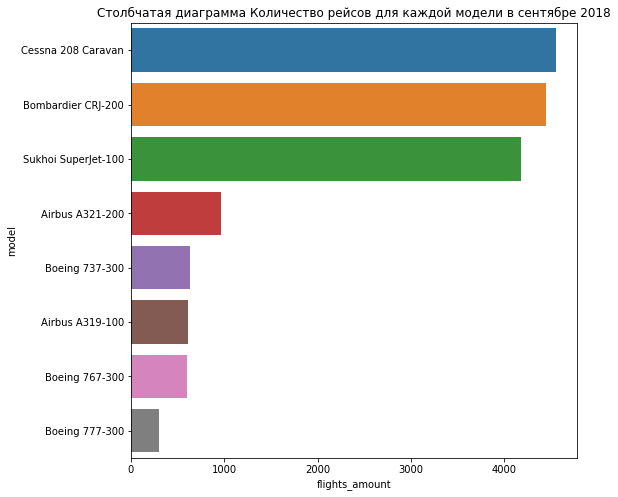

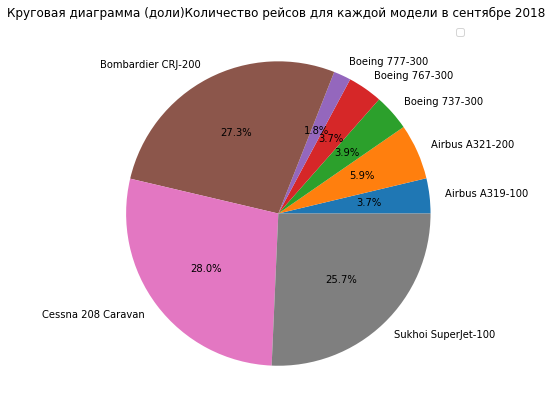

In [7]:
print_bar_pie_chart(file_model,'model','flights_amount','Количество рейсов для каждой модели в сентябре 2018')

<b>Вывод</b><br>
Как и говорилось ранее, наибольшую долю рейсов осуществляют следующие самолеты: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100 осуществили 81% рейсов. Доли всех остальных не превышают 6%.  <br>
Стоит отметить, что рекордсмен по количеству рейсов - Cessna 208 Caravan  - маленький одномоторный турбовинтовой самолет, предназначенный для перевозки небольшого количества пассажиров на небольшие расстояния. Очевидно, что в авиакомпании такие рейсы пользуются большой популярностью (возможно, для перевозки в ближайшие города или перевозки небольших, но ценных грузов).<br>
Второй по количетсву рейсов  - Bombardier CRJ-200 - также рассчитан на небольшое количество пассажиров (однако, большее, нежели Cessna 208 Caravan). Также может быть использован для перевозки некоторых грузов, перевозки пассажиров в ближайшие города, либо для перевозки воинских подразделений.<br>
Третий  -  уже более крупный самолет - Sukhoi SuperJet-100 - рассчитан на перевозку 87-108 пассажиров, что в некотрых модификациях может быть больше, чем у Bombardier CRJ-200.<br>
Все остальные самолеты расчитаны на перевозку большого количества пассажиров. Так, Airbus A321 вмещают 170-220 пассажиров, дальность их полета - 5600 км, а Boeing 777-300	вмещает 305-550 пассажиров, дальность полетов может доходить до 17500 км.<br>
Очевидно, что в авиакомпании чаще всего используются маленькие самолеты, рассчитанные на небольшую дальность полета, потому что спрос на такие рейсы достаточно высок, и выгоднее здесь запустить "чаще, но понемногу", чем "редко, но много". Однако большие самолеты с высокой дальностью полета также активно используются, где это необходимо.
    

<h4>Графики "города и количество рейсов"</h4>

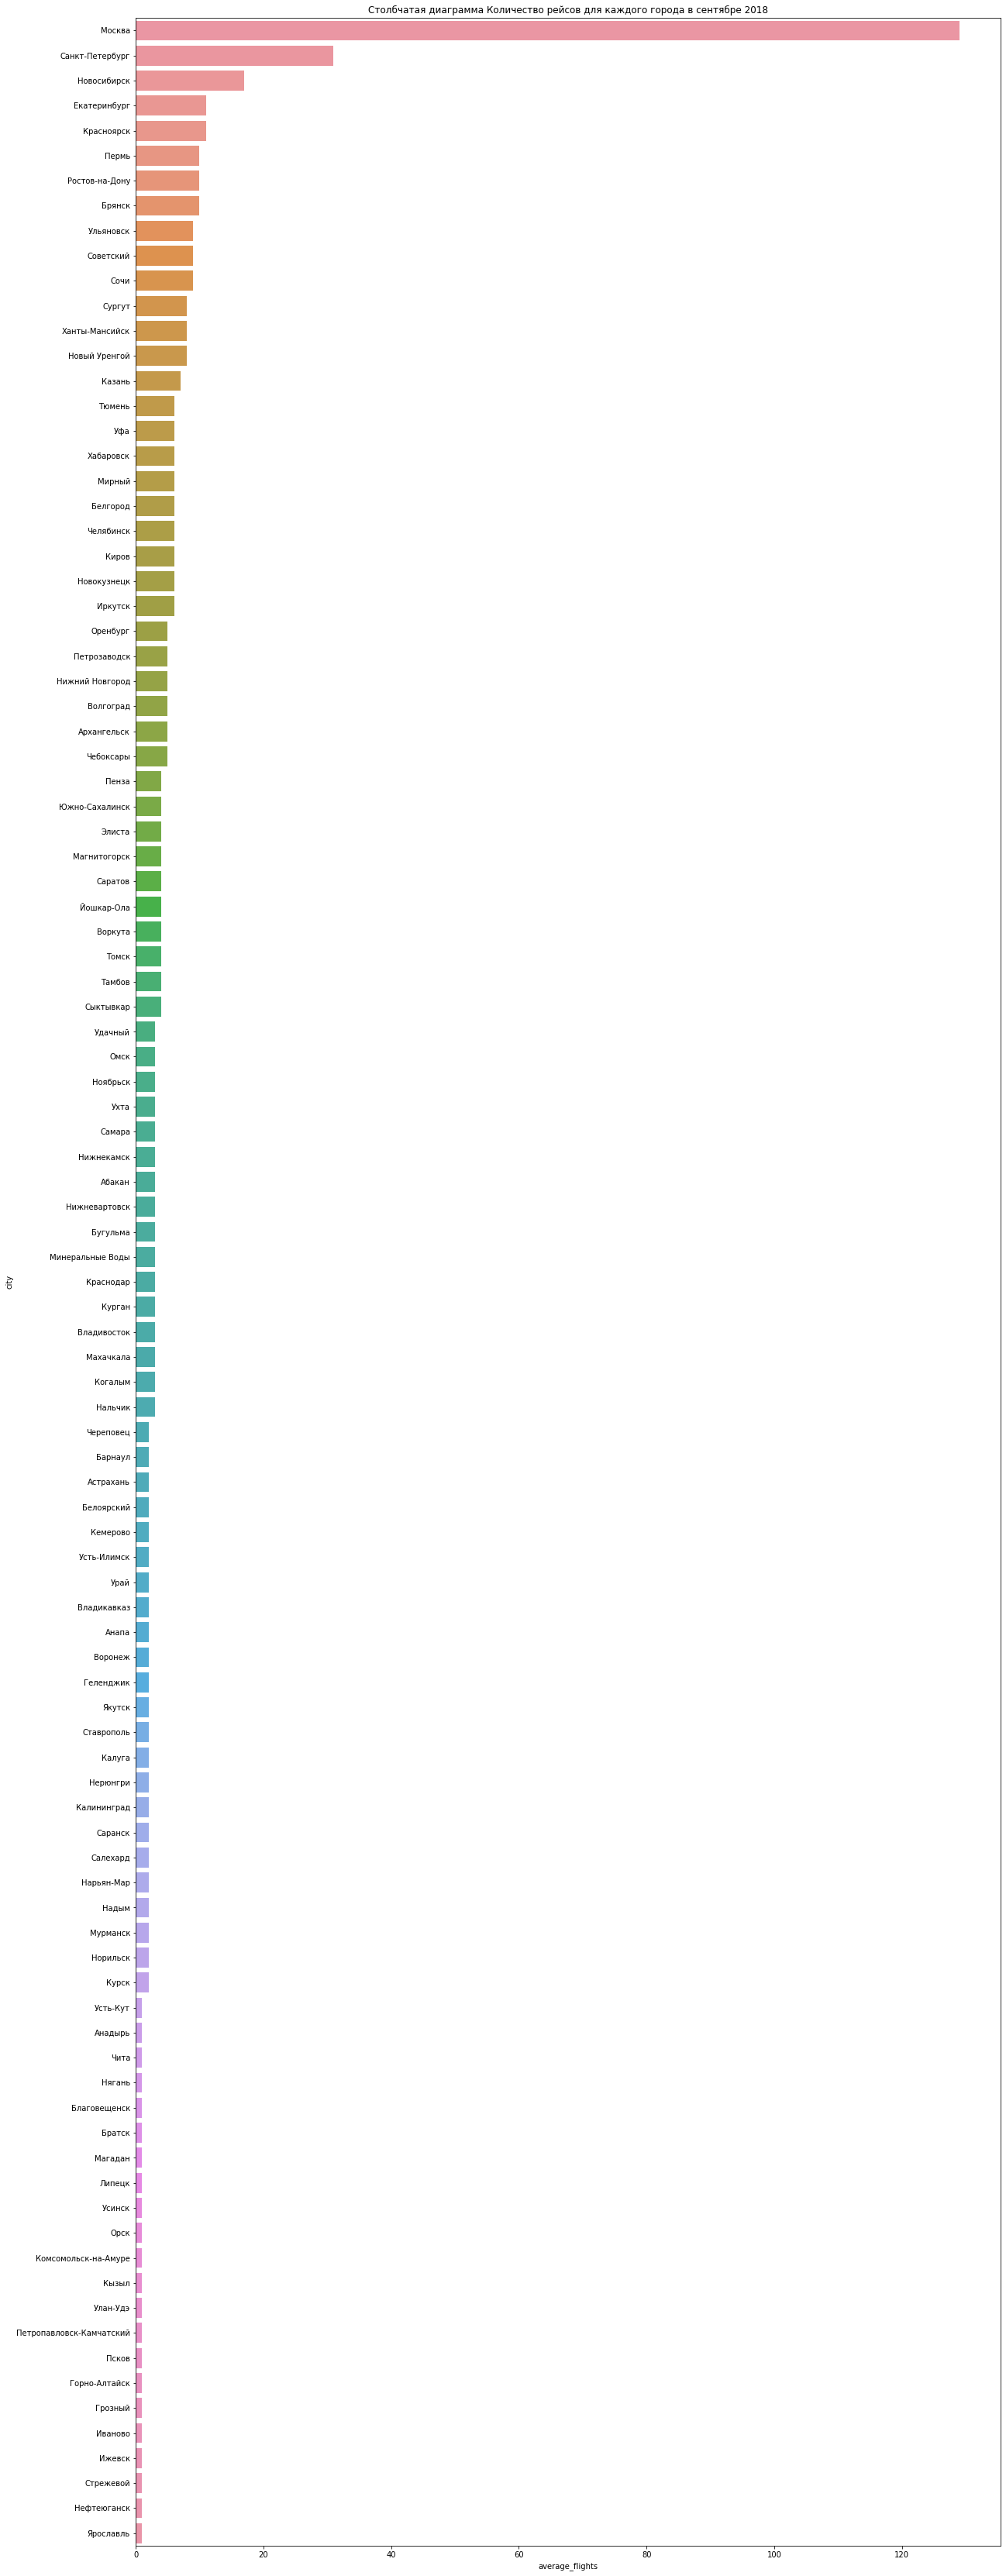

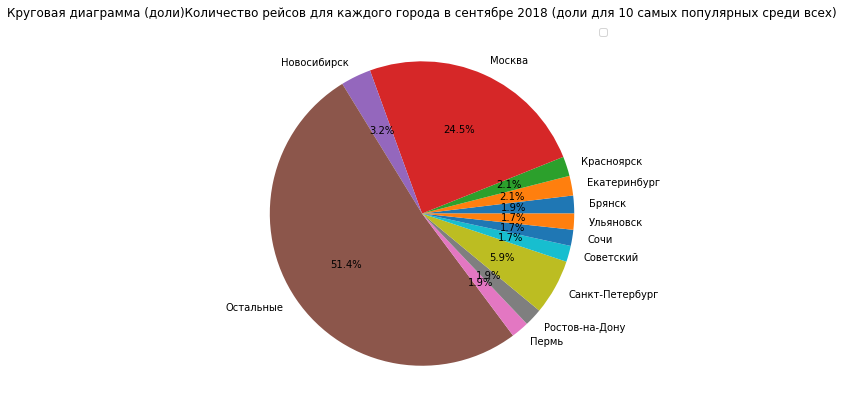

In [8]:
print_bar_pie_chart(file_city,'city','average_flights','Количество рейсов для каждого города в сентябре 2018')

<b>Вывод</b><br>
Наблюдается явный дисбаланс в количестве рейсов среди городов. Абсолютный лидер - Москва. Доля всех рейсов из Москвы - 24,5%. На втором месте - Санкт Петербург с долей всего 5,9%. На третьем - Новосибирск с долей 3,2%, на четвертом и пятом - Красноярск и Екатеринбург с долей 2,1%. Доли всех остальных городов не превышают 2% для каждого города. При этом 51.4% рейса совершаются в городах, где доля рейсов для каждого города менее 1,7%. Это говорит о полной завязке всех рейсов между городами РФ на Москве (а также наибольшем потоке рейсов за границу) <br>
Рассмотрим более подробно ТОП-10 городов

<h4>Графики "ТОП-10 городов и количество рейсов"</h4>

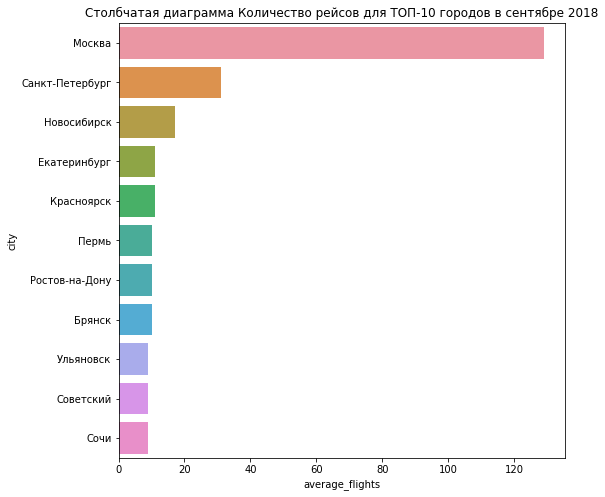

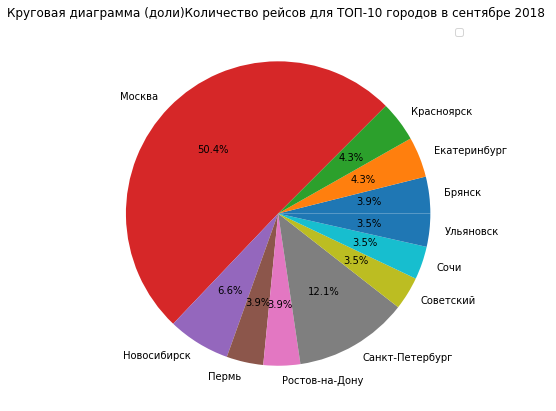

In [9]:
print_bar_pie_chart(file_city.sort_values(by = 'average_flights', ascending = False).head(11),'city','average_flights','Количество рейсов для ТОП-10 городов в сентябре 2018')

<b>Вывод</b><br>
Можно видеть, что самый популярный город по количеству вылетов - Москва (52,2% среди ТОП-10), что вполне естественно, потому что из Москвы есть рейсы в большинство городов РФ, а также из Москвы открыто наибольшее количество заграничных направлений.<br>
Второй по количетсву вылетов - Санкт - Петербуг (как и по количеству жителей в РФ), однако среднее количество вылетов в день здесь более чем в 4 раза меньше(12,6% среди ТОП-10), чем в Москве (из Москвы действиельно выше поток и аэропортов больше).<br>
Третий - Новосибирск. Крупный региональный центр с населением сыше 1 млн человек, удачно близко располооженный (в сравнении с Москвой и Санкт-Петербургом) к Китаю, Тайланду, Монголии и Казахстану. Через него довольно удобно делать рейсы в эти направления, а также достаточно большое количество ежедневных рейсов в Москву и Санкт-Петербург (что нужно как жителям Новосибирской области, так и жителям близлежащи регионов - например, Алтайского края, где всего 1-2 рейса в день в этом направлении).<br>
Также в 10 самых популярных по количеству вылетов городов попали такие крупные региональные центры как Екатеринбург,Красноярск И Пермь; а также Ростов-на-Дону и Сочи, но эти города либо сами являются туристическим центрами, либо близко к ним расположены.<br>
Такие города как Брянск и Ульяновск не являются крупными городами, однако попали в перечень 10 городов с самым большим количеством рейсов. Из данных аэропортов регулярно совершаются рейсы в Москву, Санкт-Петербург, Симферополь, Казань, а также ряд других городов туристического направления. Также в перечень попал город Советский (как 11 город. На самом деле, в изначальной сортировке он в этот список не попадал, но после приведения к целочисленному значения поля average_flights для г. Советский и г. Сочи сравнялись, и теперь при выводе ТОП-10 в список попадал не Сочи, а Советский, поэтому его тоже решено было взять в анализ). В самом деле, из г. Советский достаточно большое количество рейсов в разные города Ханты-Мансийского АО, очевидно, это один из тех городов где популярны рейсы на маловместительных самолетах, рассчитанных на небольшую дальность. <br>
